In [1]:
import pandas as pd

In [2]:
#Load dataset
data = pd.read_csv('shopping.csv')

In [3]:
data.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


In [4]:
data.shape

(3900, 18)

In [5]:
data.describe()

,Customer ID,Age,Purchase Amount (USD),Review Rating,Previous Purchases
count,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000
mean,1950.500000,44.068462,59.764359,3.749949,25.351538
std,1125.977353,15.207589,23.685392,0.716223,14.447125
min,1.000000,18.000000,20.000000,2.500000,1.000000
25%,975.750000,31.000000,39.000000,3.100000,13.000000
50%,1950.500000,44.000000,60.000000,3.700000,25.000000
75%,2925.250000,57.000000,81.000000,4.400000,38.000000
max,3900.000000,70.000000,100.000000,5.000000,50.000000


In [6]:
data.isnull().sum()

Customer ID               0
Age                       0
Gender                    0
Item Purchased            0
Category                  0
Purchase Amount (USD)     0
Location                  0
Size                      0
Color                     0
Season                    0
Review Rating             0
Subscription Status       0
Shipping Type             0
Discount Applied          0
Promo Code Used           0
Previous Purchases        0
Payment Method            0
Frequency of Purchases    0
dtype: int64

In [7]:
data.nunique()

Customer ID               3900
Age                         53
Gender                       2
Item Purchased              25
Category                     4
Purchase Amount (USD)       81
Location                    50
Size                         4
Color                       25
Season                       4
Review Rating               26
Subscription Status          2
Shipping Type                6
Discount Applied             2
Promo Code Used              2
Previous Purchases          50
Payment Method               6
Frequency of Purchases       7
dtype: int64

In [8]:
# prompt: data.keys

data.keys()
item_counts = data['Item Purchased'].value_counts()
print(item_counts)

Item Purchased
Blouse        171
Jewelry       171
Pants         171
Shirt         169
Dress         166
Sweater       164
Jacket        163
Belt          161
Sunglasses    161
Coat          161
Sandals       160
Socks         159
Skirt         158
Shorts        157
Scarf         157
Hat           154
Handbag       153
Hoodie        151
Shoes         150
T-shirt       147
Sneakers      145
Boots         144
Backpack      143
Gloves        140
Jeans         124
Name: count, dtype: int64


In [9]:
data.dtypes

Customer ID                 int64
Age                         int64
Gender                     object
Item Purchased             object
Category                   object
Purchase Amount (USD)       int64
Location                   object
Size                       object
Color                      object
Season                     object
Review Rating             float64
Subscription Status        object
Shipping Type              object
Discount Applied           object
Promo Code Used            object
Previous Purchases          int64
Payment Method             object
Frequency of Purchases     object
dtype: object

In [9]:
data.drop_duplicates(inplace=True)

In [10]:
df = pd.DataFrame(data)
grouped_by_item = df.groupby('Item Purchased')
total_purchase_per_item = grouped_by_item['Purchase Amount (USD)'].sum()
print(total_purchase_per_item)

Item Purchased
Backpack       8636
Belt           9635
Blouse        10410
Boots          9018
Coat           9275
Dress         10320
Gloves         8477
Handbag        8857
Hat            9375
Hoodie         8767
Jacket         9249
Jeans          7548
Jewelry       10010
Pants         10090
Sandals        9200
Scarf          9561
Shirt         10332
Shoes          9240
Shorts         9433
Skirt          9402
Sneakers       8635
Socks          9252
Sunglasses     9649
Sweater        9462
T-shirt        9248
Name: Purchase Amount (USD), dtype: int64


In [12]:
from matplotlib import pyplot as plt
import seaborn as sns

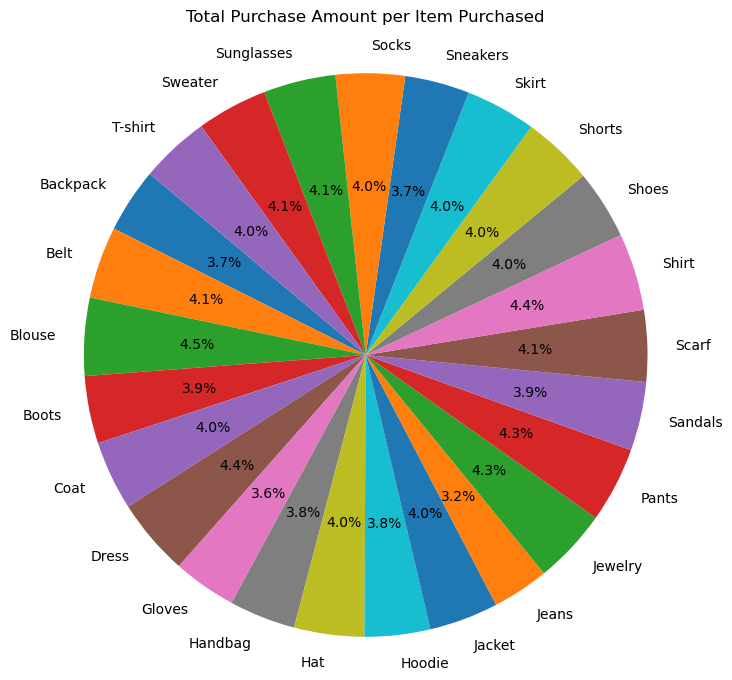

In [14]:
# Create a pie chart of the total purchase amount per item
plt.figure(figsize=(8, 8))
plt.pie(total_purchase_per_item, labels=total_purchase_per_item.index, autopct="%1.1f%%", startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.title('Total Purchase Amount per Item Purchased\n')
plt.show()

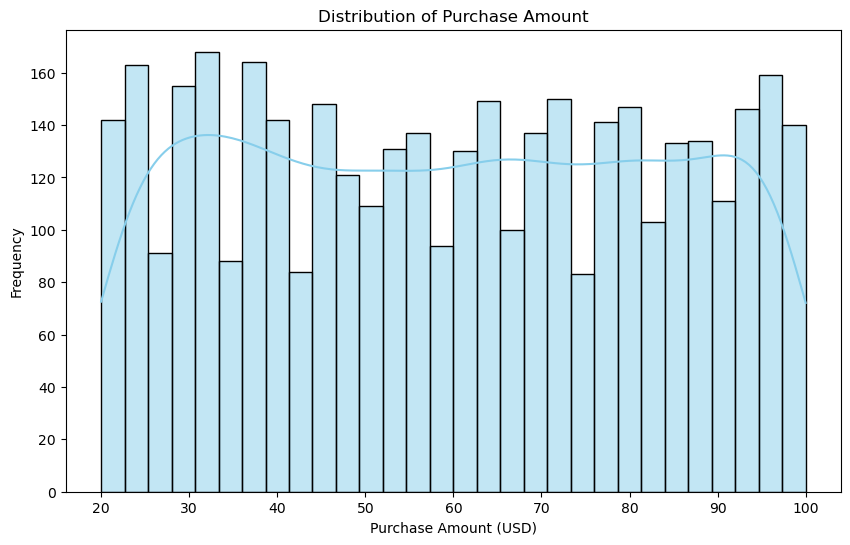

In [16]:
# Distribution of Purchase Amount
plt.figure(figsize=(10, 6))
sns.histplot(data['Purchase Amount (USD)'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Purchase Amount')
plt.xlabel('Purchase Amount (USD)')
plt.ylabel('Frequency')
plt.show()

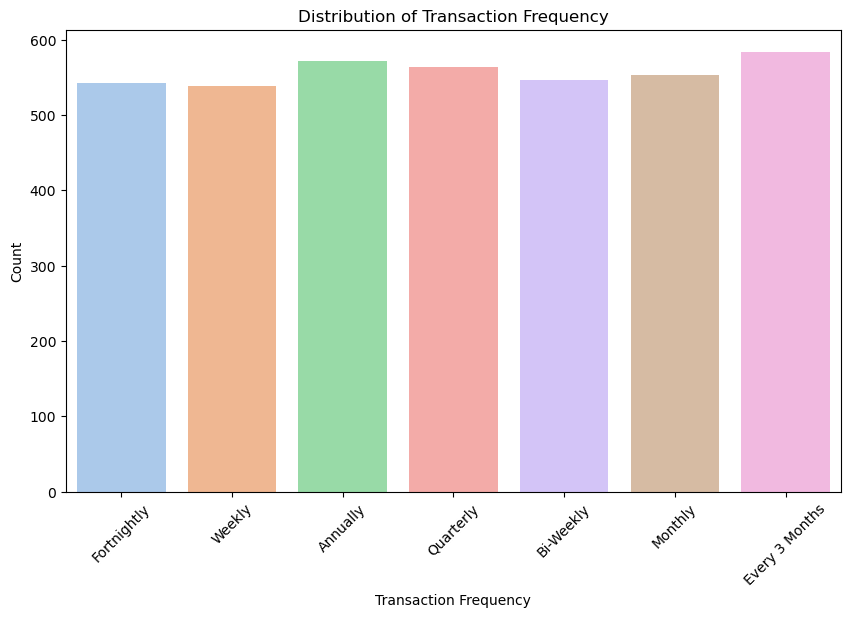

In [17]:
# Distribution of transaction frequency
plt.figure(figsize=(10, 6))
sns.countplot(x='Frequency of Purchases', data=data, palette='pastel')
plt.title('Distribution of Transaction Frequency')
plt.xlabel('Transaction Frequency')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

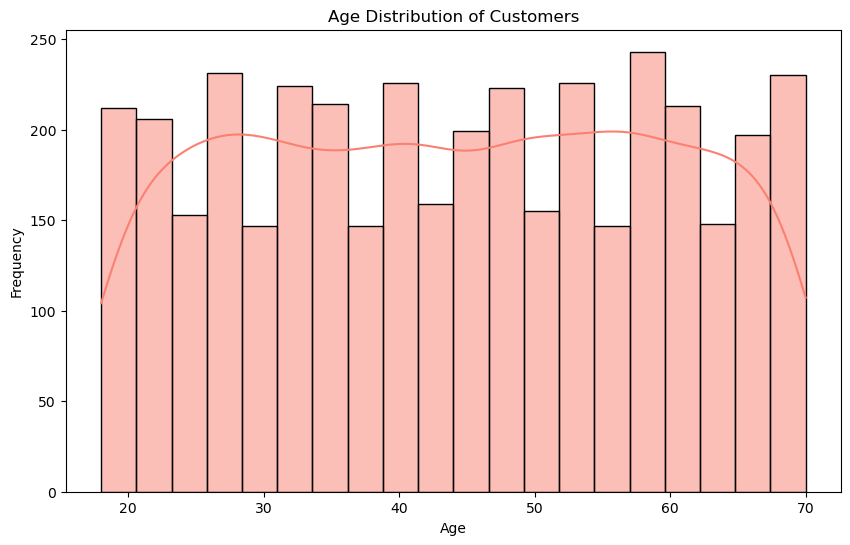

In [18]:
# Customer demographics - Age distribution
plt.figure(figsize=(10, 6))
sns.histplot(data['Age'], bins=20, kde=True, color='salmon')
plt.title('Age Distribution of Customers')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

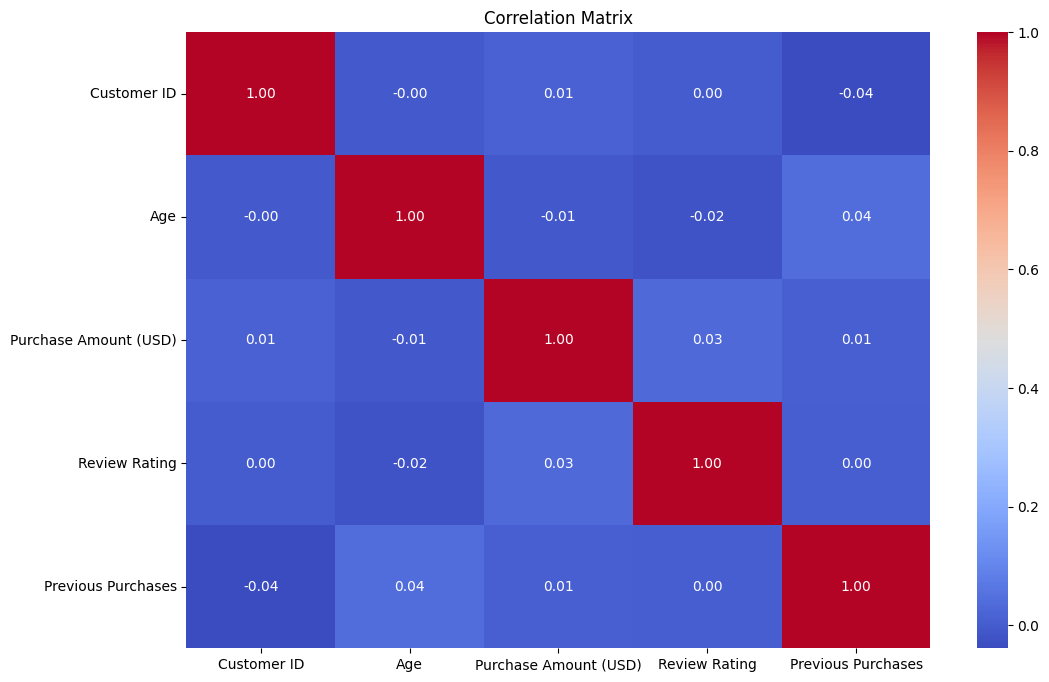

In [19]:
# Explore correlations between different variables (excluding categorical variables)
numerical_columns = data.select_dtypes(include=['int64', 'float64']).columns
correlation_matrix = data[numerical_columns].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


In [19]:
summary_statistics = data.describe()
print("Summary Statistics:\n", summary_statistics)

Summary Statistics:
        Customer ID          Age  Purchase Amount (USD)  Review Rating  \
count  3900.000000  3900.000000            3900.000000    3900.000000   
mean   1950.500000    44.068462              59.764359       3.749949   
std    1125.977353    15.207589              23.685392       0.716223   
min       1.000000    18.000000              20.000000       2.500000   
25%     975.750000    31.000000              39.000000       3.100000   
50%    1950.500000    44.000000              60.000000       3.700000   
75%    2925.250000    57.000000              81.000000       4.400000   
max    3900.000000    70.000000             100.000000       5.000000   

       Previous Purchases  
count         3900.000000  
mean            25.351538  
std             14.447125  
min              1.000000  
25%             13.000000  
50%             25.000000  
75%             38.000000  
max             50.000000  


In [20]:
product_sales = data.groupby('Item Purchased')['Purchase Amount (USD)'].sum().sort_values(ascending=False)


In [21]:
top_selling_products = product_sales.head(10)
print("Top Selling Products:\n", top_selling_products)



Top Selling Products:
 Item Purchased
Blouse        10410
Shirt         10332
Dress         10320
Pants         10090
Jewelry       10010
Sunglasses     9649
Belt           9635
Scarf          9561
Sweater        9462
Shorts         9433
Name: Purchase Amount (USD), dtype: int64


In [22]:
top_selling_categories = data[data['Item Purchased'].isin(top_selling_products.index)]['Category'].unique()
print("Categories of Top Selling Products:", top_selling_categories)

Categories of Top Selling Products: ['Clothing' 'Accessories']


In [25]:
category_sales = data.groupby('Category')['Purchase Amount (USD)'].sum().sort_values(ascending=False)

In [26]:
top_selling_categories = category_sales.head(5)
print("Top Selling Categories:\n", top_selling_categories)




Top Selling Categories:
 Category
Clothing       104264
Accessories     74200
Footwear        36093
Outerwear       18524
Name: Purchase Amount (USD), dtype: int64


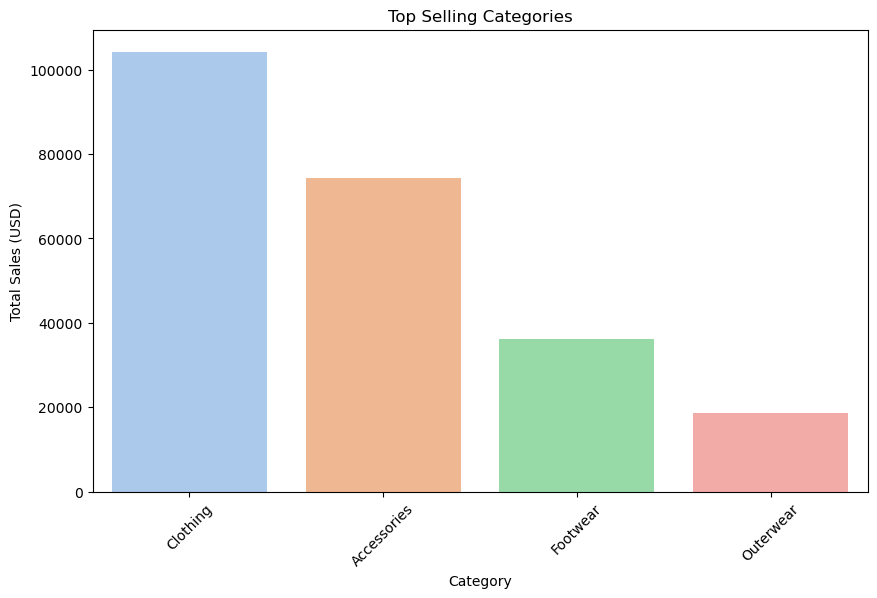

In [27]:
plt.figure(figsize=(10, 6))
sns.barplot(x=top_selling_categories.index, y=top_selling_categories.values, palette='pastel')
plt.title('Top Selling Categories')
plt.xlabel('Category')
plt.ylabel('Total Sales (USD)')
plt.xticks(rotation=45)
plt.show()

C:\Users\uttam\AppData\Local\Temp\ipykernel_4052\3421284225.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Gender', data=data, palette='pastel')


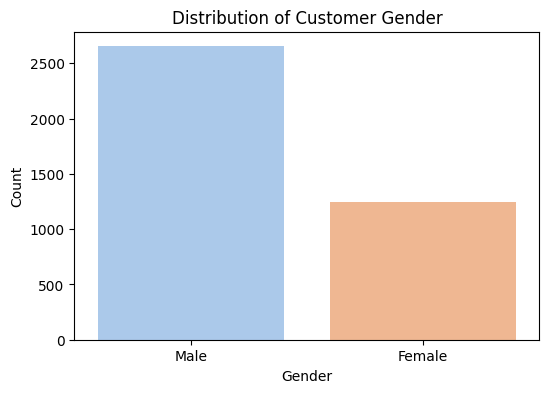

In [28]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Gender', data=data, palette='pastel')
plt.title('Distribution of Customer Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

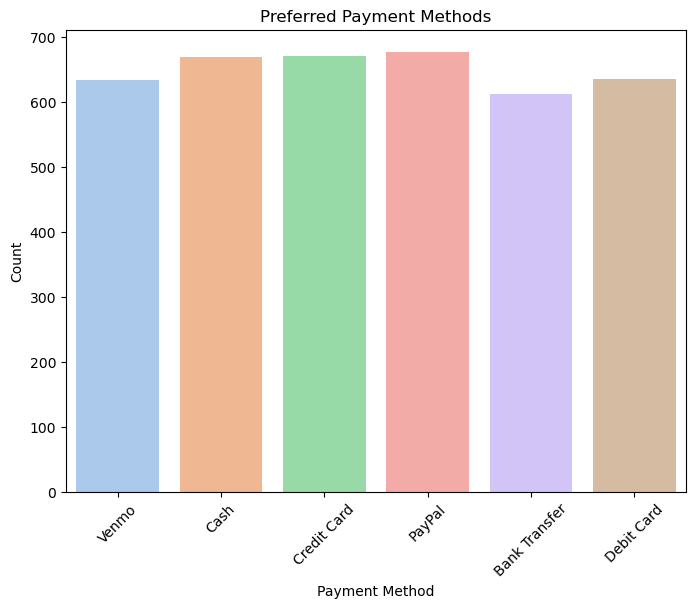

In [28]:
# Preferred payment methods
plt.figure(figsize=(8, 6))
sns.countplot(x='Payment Method', data=data, palette='pastel')
plt.title('Preferred Payment Methods')
plt.xlabel('Payment Method')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [29]:
average_age = data['Age'].mean()
most_common_payment_method = data['Payment Method'].mode()[0]

In [30]:
print("Average Age of Customers:", average_age)
print("Most Common Payment Method:", most_common_payment_method)

Average Age of Customers: 44.06846153846154
Most Common Payment Method: PayPal


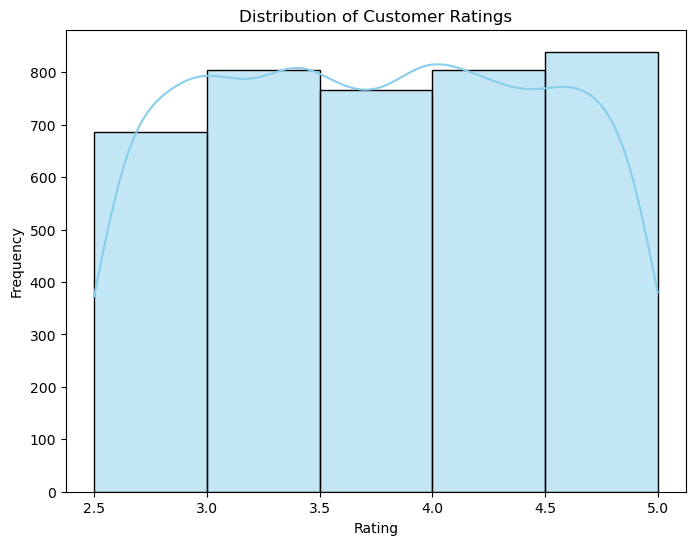

In [41]:
# Explore Ratings Distribution
plt.figure(figsize=(8, 6))
sns.histplot(data['Review Rating'], bins=5, kde=True, color='skyblue')
plt.title('Distribution of Customer Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

In [42]:
# 3. Analyze ratings by product
average_rating_by_product = data.groupby('Item Purchased')['Review Rating'].mean().sort_values(ascending=False)
print("Average Rating by Product:")
print(average_rating_by_product)


Average Rating by Product:
Item Purchased
Gloves        3.864286
Sandals       3.841250
Boots         3.812500
Hat           3.806494
T-shirt       3.782993
Skirt         3.782278
Handbag       3.775163
Sweater       3.767073
Jacket        3.763190
Belt          3.761491
Sneakers      3.757931
Jewelry       3.756140
Dress         3.754819
Backpack      3.752448
Socks         3.750943
Shoes         3.747333
Sunglasses    3.744720
Coat          3.730435
Hoodie        3.719205
Pants         3.718713
Shorts        3.711465
Scarf         3.700000
Blouse        3.683626
Jeans         3.648387
Shirt         3.629586
Name: Review Rating, dtype: float64


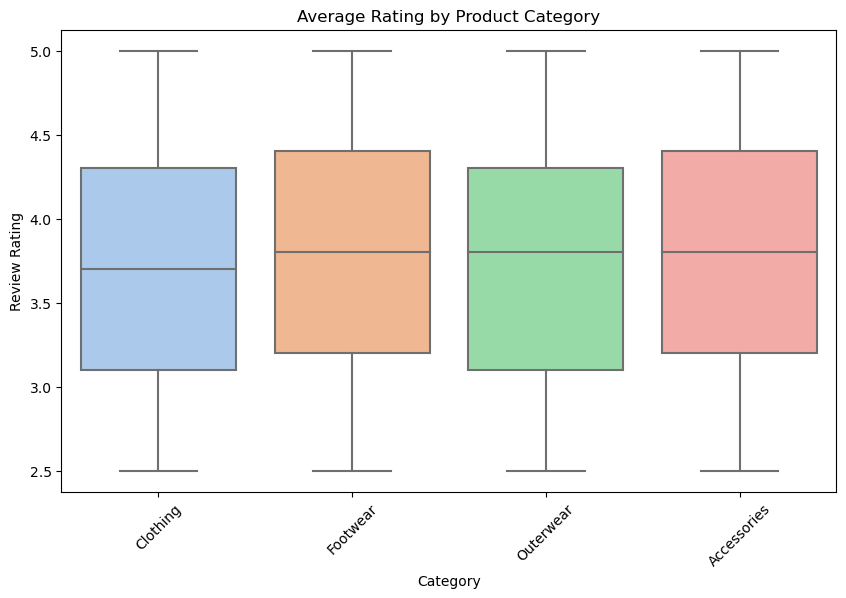

In [54]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Category', y='Review Rating', data=data, palette='pastel')
plt.title('Average Rating by Product Category')
plt.xlabel('Category')
plt.ylabel('Review Rating')
plt.xticks(rotation=45)
plt.show()



In [45]:
# Convert "Discount Applied" column to binary values (1 for Yes, 0 for No)
data['Discount Applied'] = data['Discount Applied'].map({'Yes': 1, 'No': 0})

# 2. Identify Transactions with Discounts or Promotions
discount_transactions = data[data['Discount Applied'] == 1]

# 3. Analyze Sales Performance during Promotional Periods
# Calculate sales revenue during promotional periods
promotional_revenue = discount_transactions['Purchase Amount (USD)'].sum()

# Calculate sales revenue during non-promotional periods
non_promotional_revenue = data[data['Discount Applied'] == 0]['Purchase Amount (USD)'].sum()


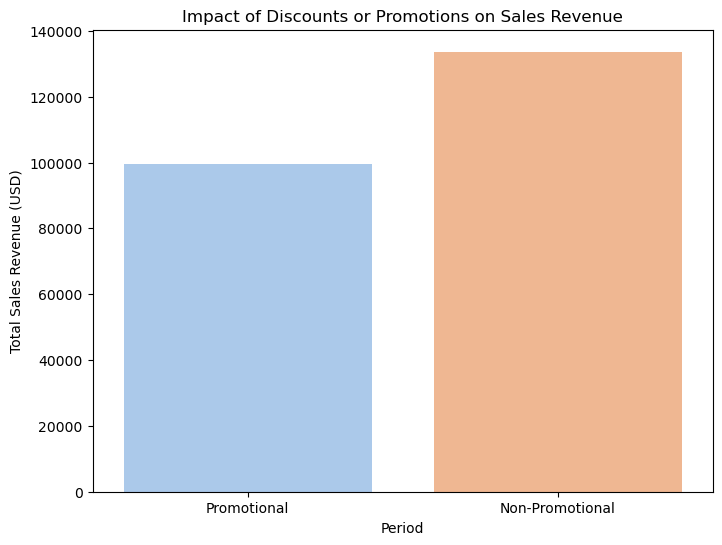

In [46]:
# 4. Visualize the Impact of Discounts or Promotions
plt.figure(figsize=(8, 6))
sns.barplot(x=['Promotional', 'Non-Promotional'], y=[promotional_revenue, non_promotional_revenue], palette='pastel')
plt.title('Impact of Discounts or Promotions on Sales Revenue')
plt.xlabel('Period')
plt.ylabel('Total Sales Revenue (USD)')
plt.show()

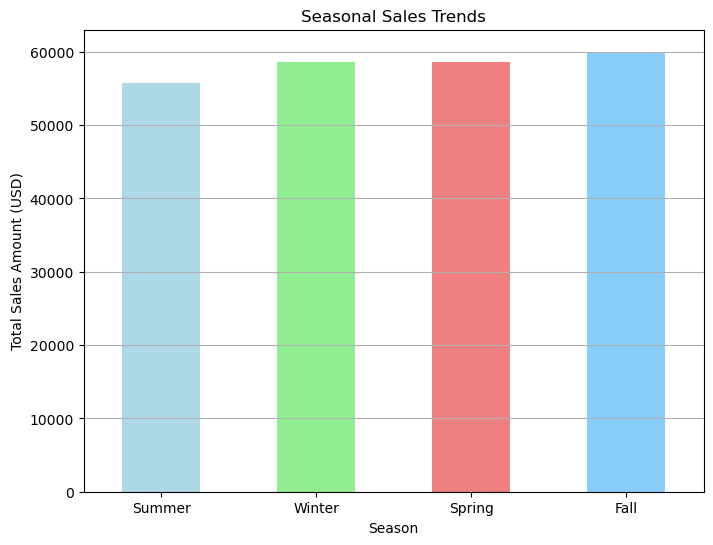

In [52]:
seasonal_sales = data.groupby('Season')['Purchase Amount (USD)'].sum()

# # 4. Visualize Seasonal Trends in pie chart

# plt.figure(figsize=(8, 8))
# seasonal_sales.plot(kind='pie', autopct='%1.1f%%', colors=['lightblue', 'lightgreen', 'lightcoral', 'lightskyblue'])
# plt.title('Seasonal Sales Trends')
# plt.ylabel('')
# plt.show()
# plt.figure(figsize=(8, 6))
# seasonal_sales.plot(kind='bar', color='skyblue')
# plt.title('Seasonal Sales Trends')
# plt.xlabel('Season')
# plt.ylabel('Total Sales Amount (USD)')
# plt.xticks(rotation=0)
# plt.grid(axis='y')
# plt.show()

# 4. Visualize Seasonal Trends in bar chart with different colors in ascending order
plt.figure(figsize=(8, 6))
seasonal_sales.sort_values().plot(kind='bar', color=['lightblue', 'lightgreen', 'lightcoral', 'lightskyblue'])
plt.title('Seasonal Sales Trends')
plt.xlabel('Season')
plt.ylabel('Total Sales Amount (USD)')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

